# Problem Statement

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Let's get started!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [3]:
ecomm = pd.read_csv('Ecommerce Customers')

In [4]:
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
ecomm.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**


In [7]:
sns.set_style('whitegrid')

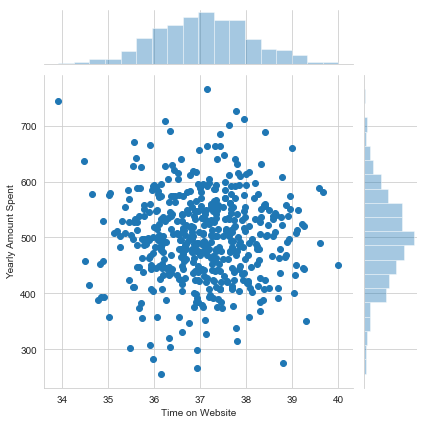

In [8]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = ecomm)

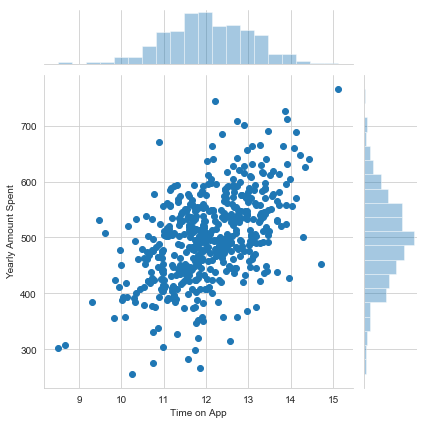

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecomm)

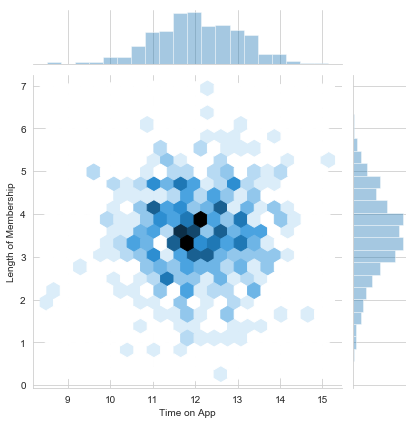

In [11]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = ecomm, kind = 'hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.

In [12]:
sns.set_style('darkgrid')

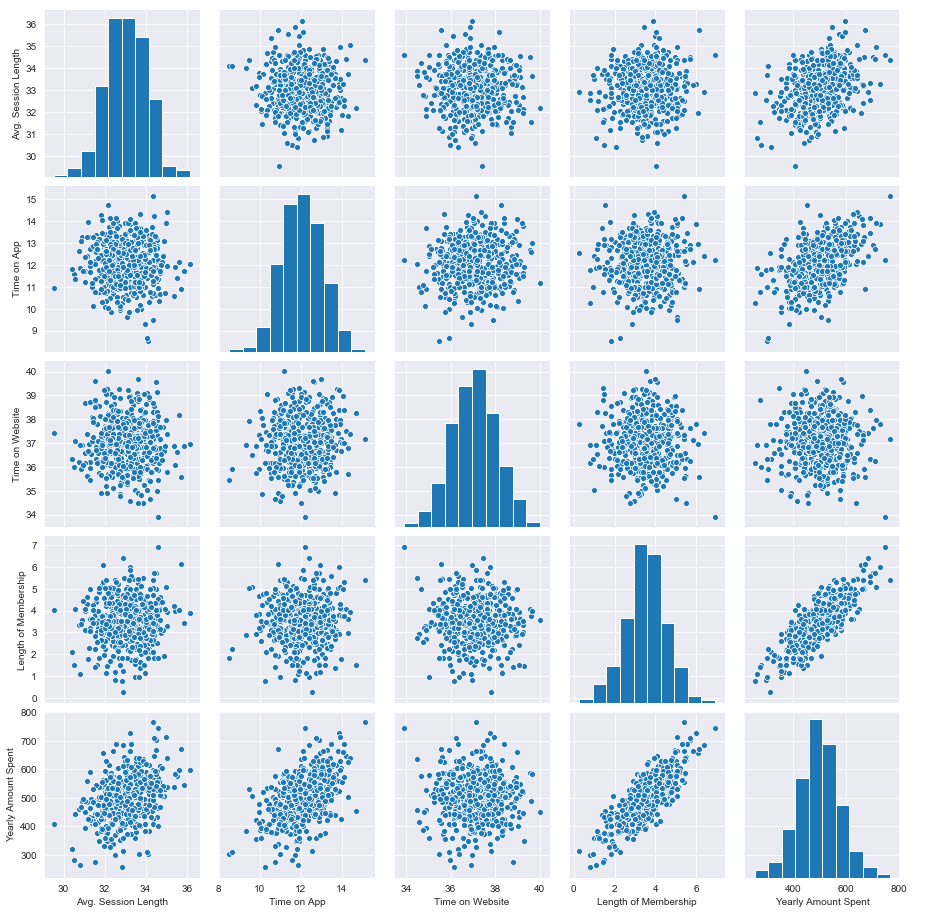

In [13]:
sns.pairplot(ecomm)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

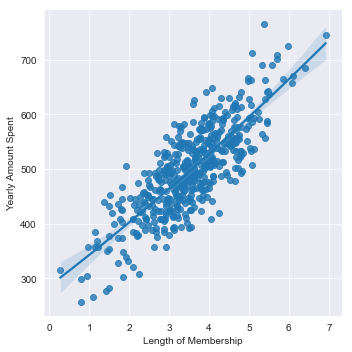

In [14]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = ecomm, order = 2)

## Training and Testing Data


In [15]:
ecomm.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
X = ecomm[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = ecomm['Yearly Amount Spent']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model



In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing out the coefficients of the model**

In [22]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['coefficients'])
coeff

,coefficients
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Predicting Test Data


In [23]:
p = lm.predict(X_test)

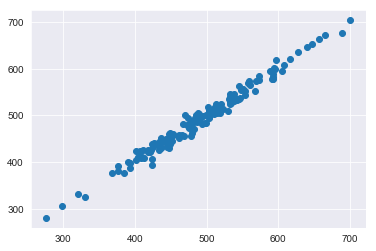

In [24]:
plt.scatter(y_test, p)

## Evaluating the Model



In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, p))
print('MSE:', metrics.mean_squared_error(y_test, p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p)))

MAE: 8.426091641432125
MSE: 103.91554136503383
RMSE: 10.19389726086318


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 


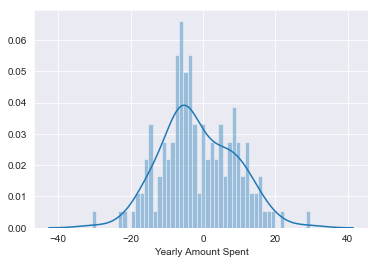

In [26]:
sns.distplot((y_test-p), bins = 50)

## Conclusion


In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!